## Imports

In [28]:
import pandas as pd

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Pré-processamento
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#Modelos
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Metricas
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
%matplotlib inline

#Cansei de warnings
import warnings
warnings.filterwarnings('ignore')

## Dataset: House Prices

In [29]:
df = pd.read_csv('../input/train.csv')
y = df.SalePrice
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Compreendendo os dados

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [31]:
# Encontrando valore NaN em cada coluna
df[df.columns[df.isnull().any()]].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

# Fazendo a limpeza dos dados

In [32]:
# Removendo colunas que possuem muitos dados com valor nulo
df = df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'], axis=1)
df[df.columns[df.isnull().any()]].isnull().sum()

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [33]:
df.select_dtypes(exclude=['object']).corr().loc[:, 'SalePrice'].sort_values(ascending=False)[1:]

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [34]:
# Removendo colunas que possuem baixa correlação com SalePrice
df = df.drop(['KitchenAbvGr', 'EnclosedPorch', 'MSSubClass', 'OverallCond', 'YrSold','LowQualFinSF','Id','MiscVal',
              'BsmtHalfBath','BsmtFinSF2','3SsnPorch','MoSold','PoolArea','ScreenPorch','BedroomAbvGr'], axis=1)

# Tratando os dados

## Transformação de strings em categorias

In [35]:
# Transformando strings em dados numéricos
#df_categCols = df.iloc[:,:-1]
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i]=preprocessing.LabelEncoder().fit_transform(df[[i]])
df

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice
0,3,65.0,8450,1,3,3,0,4,0,5,...,2,548,4,4,2,0,61,8,4,208500
1,3,80.0,9600,1,3,3,0,2,0,24,...,2,460,4,4,2,298,0,8,4,181500
2,3,68.0,11250,1,0,3,0,4,0,5,...,2,608,4,4,2,0,42,8,4,223500
3,3,60.0,9550,1,0,3,0,0,0,6,...,3,642,4,4,2,0,35,8,0,140000
4,3,84.0,14260,1,0,3,0,2,0,15,...,3,836,4,4,2,192,84,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,62.0,7917,1,3,3,0,4,0,8,...,2,460,4,4,2,0,40,8,4,175000
1456,3,85.0,13175,1,3,3,0,4,0,14,...,2,500,4,4,2,349,0,8,4,210000
1457,3,66.0,9042,1,3,3,0,4,0,6,...,1,252,4,4,2,0,60,8,4,266500
1458,3,68.0,9717,1,3,3,0,4,0,12,...,1,240,4,4,2,366,0,8,4,142125


## Substituindo dados nulos

In [36]:
# Preenchimento dos nulos com a média ponderada dos valores de cada coluna

# Calculando a média ponderada considerando o número de valores não nulos em cada coluna
media_ponderada = df.apply(lambda col: col.mean(skipna=True), axis=0)

# Substituindo os valores NaN pela média ponderada de cada coluna
df_fillna = df.apply(lambda col: col.fillna(media_ponderada[col.name]), axis=0)

## Verificando correlação

<Axes: >

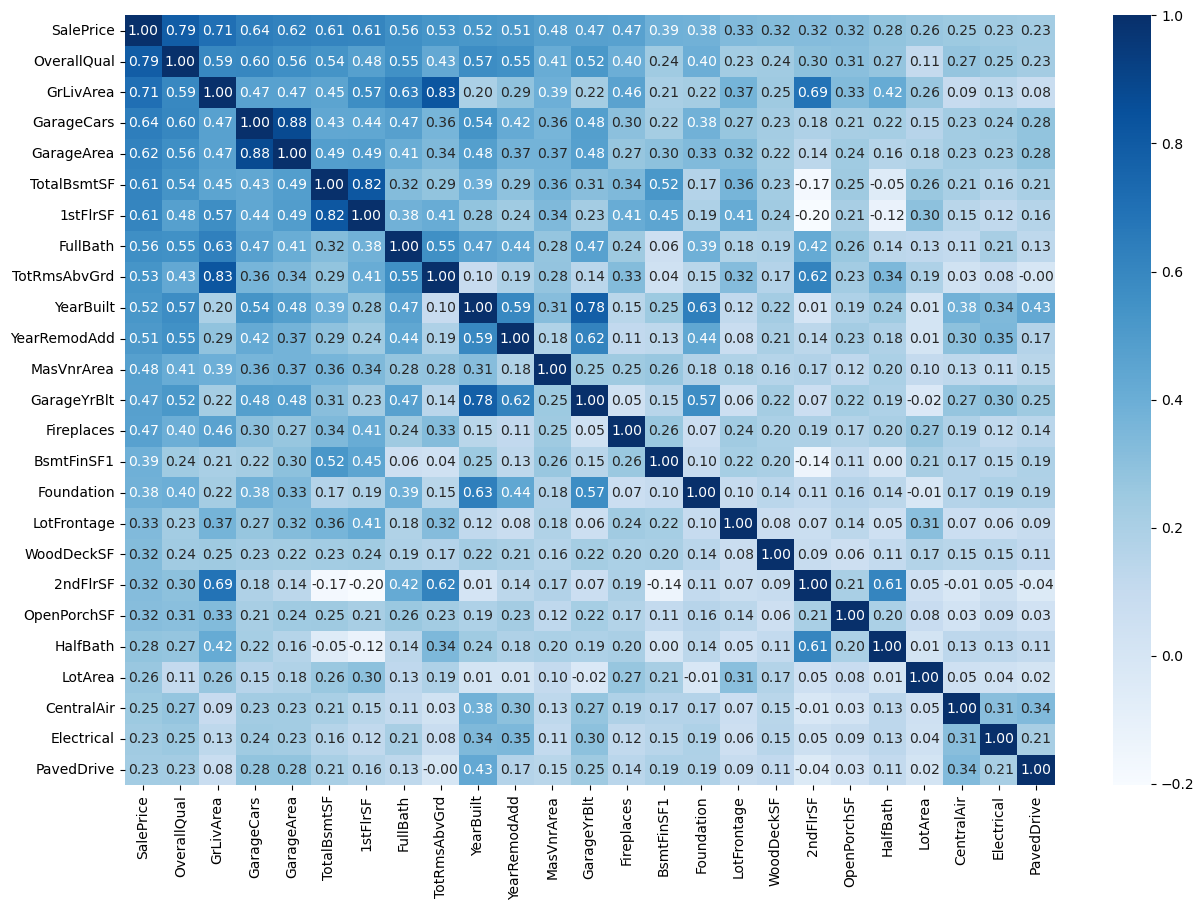

In [37]:
# Fazendo a correlação apenas com dados numéricos e com valores nulos substituidos pela media ponderada
corr = df_fillna.corr()

# corr_filter = corr.mask((corr <= 0.4) & (corr >= -0.4), other=None)
plt.figure(figsize=(15,10))

# Obtendo as 25 colunas com as maiores correlações
sns.heatmap(df_fillna[df_fillna.corr().nlargest(25, 'SalePrice').index].corr(), annot = True, cbar=True, fmt=".2f",cmap = "Blues")

In [38]:
# Escolhendo alguns atributos
features = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath',
            'TotRmsAbvGrd','YearBuilt','YearRemodAdd','MasVnrArea','GarageYrBlt','Fireplaces']
X = df_fillna[features]
X.describe()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,GarageYrBlt,Fireplaces
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1515.463699,1.767123,472.980137,1057.429452,1162.626712,1.565068,6.517808,1971.267808,1984.865753,103.685262,1978.506164,0.613014
std,1.382997,525.480383,0.747315,213.804841,438.705324,386.587738,0.550916,1.625393,30.202904,20.645407,180.569112,23.994583,0.644666
min,1.000000,334.000000,0.000000,0.000000,0.000000,334.000000,0.000000,2.000000,1872.000000,1950.000000,0.000000,1900.000000,0.000000
25%,5.000000,1129.500000,1.000000,334.500000,795.750000,882.000000,1.000000,5.000000,1954.000000,1967.000000,0.000000,1962.000000,0.000000
50%,6.000000,1464.000000,2.000000,480.000000,991.500000,1087.000000,2.000000,6.000000,1973.000000,1994.000000,0.000000,1978.506164,1.000000
75%,7.000000,1776.750000,2.000000,576.000000,1298.250000,1391.250000,2.000000,7.000000,2000.000000,2004.000000,164.250000,2001.000000,1.000000
max,10.000000,5642.000000,4.000000,1418.000000,6110.000000,4692.000000,3.000000,14.000000,2010.000000,2010.000000,1600.000000,2010.000000,3.000000


## Treinando um Modelo

In [39]:
# Dados de treino e validação
train_X_lr, test_X_lr, train_y_lr, test_y_lr = train_test_split(X, y, random_state=1, test_size = 0.2)

print("Qtde train: "+ str(len(train_X_lr)))
print("Qtde val: "+ str(len(test_X_lr)))

scale = MinMaxScaler()
train_X_lr = scale.fit_transform(train_X_lr)
test_X_lr = scale.transform(test_X_lr)

Qtde train: 1168
Qtde val: 292


## Random Forest

In [40]:
train_X_rf, test_X_rf, train_y_rf, test_y_rf = train_test_split(X, y, random_state=1, test_size = 0.2)

scale = MinMaxScaler()
train_X_rf = scale.fit_transform(train_X_rf)
test_X_rf = scale.transform(test_X_rf)

In [41]:
# Random Forest
model_rf = RandomForestRegressor(random_state=1)
model_rf.fit(train_X_rf, train_y_rf)
pred_rf = model_rf.predict(test_X_rf)

rf_test_r2 = r2_score(pred_rf, test_y_rf)
rf_test_mae = mean_absolute_error(pred_rf, test_y_rf)
rf_test_rmse = mean_squared_error(pred_rf, test_y_rf, squared = False)

print("Validation R2 for Random Forest Model: {:.3f}".format(rf_test_r2))
print("Validation MAE for Random Forest Model: {:.2f}".format(rf_test_mae))
print("Validation RMSE for Random Forest Model: {:.2f}".format(rf_test_rmse))

Validation R2 for Random Forest Model: 0.834
Validation MAE for Random Forest Model: 18257.77
Validation RMSE for Random Forest Model: 29825.68


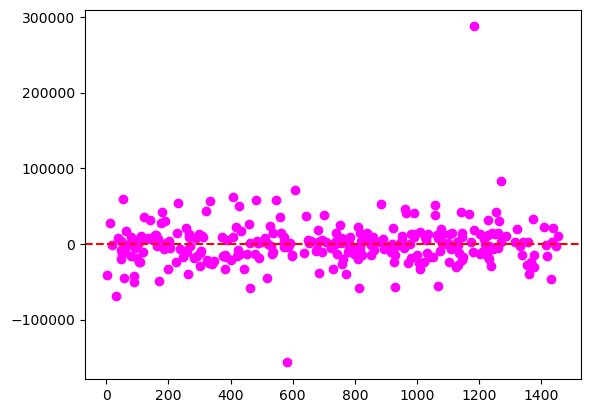

In [42]:
plt.plot(test_y_rf-pred_rf, 'o', color='magenta')
plt.axhline(y=0, color='red', linestyle='--')

## XGBoost

In [43]:
train_X_XGB, test_X_XGB, train_y_XGB, test_y_XGB = train_test_split(X, y, test_size=0.2)

imputer = SimpleImputer(strategy='mean')
train_X_XGB = imputer.fit_transform(train_X_XGB)
test_X_XGB = imputer.transform(test_X_XGB)

In [44]:
model_XGB = XGBRegressor(n_estimators=500, learning_rate=0.05, early_stopping_rounds=5)
model_XGB.fit(train_X_XGB, train_y_XGB, eval_set=[(test_X_XGB, test_y_XGB)], verbose=False)
pred_XGB = model_XGB.predict(test_X_XGB)

XGB_test_r2 = r2_score(pred_XGB, test_y_XGB)
XGB_test_mae = mean_absolute_error(pred_XGB, test_y_XGB)
XGB_test_rmse = mean_squared_error(pred_XGB, test_y_XGB, squared = False)

print("Validation R2 for XGBoost Model: {:.3f}".format(XGB_test_r2))
print("Validation MAE for XGBoost Model: {:.2f}".format(XGB_test_mae))
print("Validation RMSE for XGBoost Model: {:.2f}".format(XGB_test_rmse))

Validation R2 for XGBoost Model: 0.843
Validation MAE for XGBoost Model: 18844.55
Validation RMSE for XGBoost Model: 28850.71


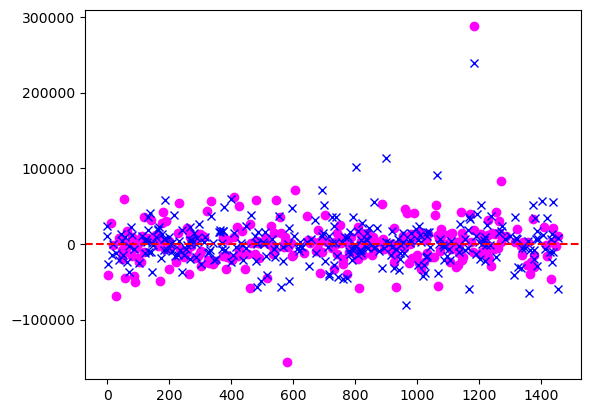

In [45]:
plt.plot(test_y_rf-pred_rf, 'o', color='magenta')
plt.plot(test_y_XGB-pred_XGB, 'x', color='blue')
plt.axhline(y=0, color='red', linestyle='--')

## LightGBM

In [46]:
train_X_LGBM, test_X_LGBM, train_y_LGBM, test_y_LGBM = train_test_split(X, y, test_size=0.2)

imputer = SimpleImputer(strategy='mean')
train_X_LGBM = imputer.fit_transform(train_X_LGBM)
test_X_LGBM = imputer.transform(test_X_LGBM)

In [47]:
model_LGBM = LGBMRegressor(n_estimators=500, learning_rate=0.05)
model_LGBM.fit(train_X_LGBM, train_y_LGBM, early_stopping_rounds=5, eval_set=[(test_X_LGBM, test_y_LGBM)], verbose=False)
pred_LGBM = model_LGBM.predict(test_X_LGBM)

LGBM_test_r2 = r2_score(pred_LGBM, test_y_LGBM)
LGBM_test_mae = mean_absolute_error(pred_LGBM, test_y_LGBM)
LGBM_test_rmse = mean_squared_error(pred_LGBM, test_y_LGBM, squared = False)

print("Validation R2 for LightGBM Model: {:.3f}".format(LGBM_test_r2))
print("Validation MAE for LightGBM Model: {:.2f}".format(LGBM_test_mae))
print("Validation RMSE for LightGBM Model: {:.2f}".format(LGBM_test_rmse))

Validation R2 for LightGBM Model: 0.762
Validation MAE for LightGBM Model: 19977.03
Validation RMSE for LightGBM Model: 35591.36


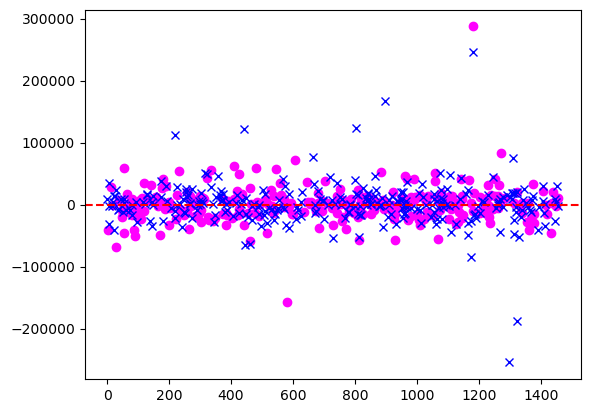

In [48]:
plt.plot(test_y_rf-pred_rf, 'o', color='magenta')
plt.plot(test_y_LGBM-pred_LGBM, 'x', color='blue')
plt.axhline(y=0, color='red', linestyle='--')

## CatBoost

In [49]:
train_X_cat, test_X_cat, train_y_cat, test_y_cat = train_test_split(X, y, test_size=0.2)

imputer = SimpleImputer(strategy='mean')
train_X_cat = imputer.fit_transform(train_X_cat)
test_X_cat = imputer.transform(test_X_cat)

In [50]:
model_cat = CatBoostRegressor(iterations=500, learning_rate=0.05, verbose=False)
model_cat.fit(train_X_cat, train_y_cat, early_stopping_rounds=5,eval_set=[(test_X_cat, test_y_cat)], verbose=False)
pred_cat = model_cat.predict(test_X_cat)

cat_test_r2 = r2_score(pred_cat, test_y_cat)
cat_test_mae = mean_absolute_error(pred_cat, test_y_cat)
cat_test_rmse = mean_squared_error(pred_cat, test_y_cat, squared = False)

print("Validation R2 for CatBoost Model: {:.2f}".format(cat_test_r2))
print("Validation MAE for CatBoost Model: {:.2f}".format(cat_test_mae))
print("Validation RMSE for CatBoost Model: {:.2f}".format(cat_test_rmse))

Validation R2 for CatBoost Model: 0.83
Validation MAE for CatBoost Model: 19130.33
Validation RMSE for CatBoost Model: 28804.01


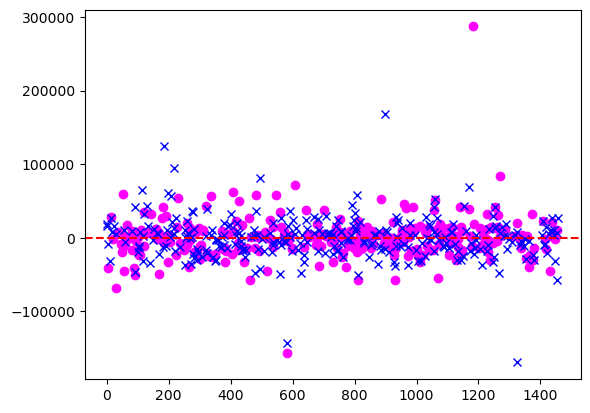

In [51]:
plt.plot(test_y_rf-pred_rf, 'o', color='magenta')
plt.plot(test_y_cat-pred_cat, 'x', color='blue')
plt.axhline(y=0, color='red', linestyle='--')